In [ ]:
import sys
IS_COLAB = "google.colab" in sys.modules

if IS_COLAB:
    !apt update && apt install -y libpq-dev libsdl2-dev swig xorg-dev xvfb
    %pip install -U tf-agents pyvirtualdisplay # pyvirtualdisplay library 설치
    %pip install -U gym>=0.21.0
    %pip install -U gym[box2d,atari,accept-rom-license]

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:6 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:14 http://ppa.launchpad.net/graphics-driver

#OpenAI gym


강화학습을 위해서는 Agent와 환경을 구축해야 한다. 물리적으로 구축하려면 많은 제약이 있기 때문에 이를 가상으로 구축할 수 있는 서비스를 제공하는 툴킷이 존재한다. 

In [ ]:
import gym
import matplotlib.pyplot as plt
import numpy as np

보면 알 수 있듯이 OpenAI Gym을 사용할 때 이용 가능한 환경은 매우 다양하다. 우리는 그 중 'CartPole-v1'환경을 사용할 것이다. CartPole-v1 환경은 카트 위에 놓인 막대가 떨어지지 않도록 왼쪽이나 오른쪽으로 가속할 수 있는 2D 시뮬레이션이다.

In [ ]:
gym.envs.registry.all() #가능한 environment 목록

dict_values([EnvSpec(Copy-v0), EnvSpec(RepeatCopy-v0), EnvSpec(ReversedAddition-v0), EnvSpec(ReversedAddition3-v0), EnvSpec(DuplicatedInput-v0), EnvSpec(Reverse-v0), EnvSpec(CartPole-v0), EnvSpec(CartPole-v1), EnvSpec(MountainCar-v0), EnvSpec(MountainCarContinuous-v0), EnvSpec(Pendulum-v0), EnvSpec(Acrobot-v1), EnvSpec(LunarLander-v2), EnvSpec(LunarLanderContinuous-v2), EnvSpec(BipedalWalker-v3), EnvSpec(BipedalWalkerHardcore-v3), EnvSpec(CarRacing-v0), EnvSpec(Blackjack-v0), EnvSpec(KellyCoinflip-v0), EnvSpec(KellyCoinflipGeneralized-v0), EnvSpec(FrozenLake-v0), EnvSpec(FrozenLake8x8-v0), EnvSpec(CliffWalking-v0), EnvSpec(NChain-v0), EnvSpec(Roulette-v0), EnvSpec(Taxi-v3), EnvSpec(GuessingGame-v0), EnvSpec(HotterColder-v0), EnvSpec(Reacher-v2), EnvSpec(Pusher-v2), EnvSpec(Thrower-v2), EnvSpec(Striker-v2), EnvSpec(InvertedPendulum-v2), EnvSpec(InvertedDoublePendulum-v2), EnvSpec(HalfCheetah-v2), EnvSpec(HalfCheetah-v3), EnvSpec(Hopper-v2), EnvSpec(Hopper-v3), EnvSpec(Swimmer-v2), EnvSp

cartpole의 reset메소드는 [카트의 수평 위치(0.0 = 중앙), 카트의 속도(양수는 우측 방향을 의미), 막대의 각도(0.0 = 수직), 막대의 각속도(양수는 시계 방향을 의미)] 의 array를 반환한다.

In [ ]:
env=gym.make('CartPole-v1')
env.seed(42)
obs=env.reset() #environment 초기화
obs # environment 초기화는 첫 번째 관측을 반환

array([-0.01258566, -0.00156614,  0.04207708, -0.00180545])

이제 render()메소드를 활용해 환경을 출력해야 하는데, 한 가지 문제점이 있다. Carpole과 같은 환경들은 사용자의 display에 접근해 창을 띄워 환경에 대한 정보를 나타내야 하는데, 우리가 사용하는 colab은 가상환경을 사용하는 headlesss server이다. 때문에 Xvfb, Xdummy 같은 가짜 X server를 install 해야 한다. 우리는 Xvfb(X virtual framebuffer) server를 사용할 것이다.


Xvfb에서 framebuffer는 화면에 나타날 영상 정보를 저장하는 buffer이다. 프레임버퍼의 각 기억단위는 화면에 있는 하나의 pixel에 대응되고, 화면의 pixel의 on/off나 색깔을 bitmap으로 기억하게 된다. 이 framebuffer에 특정 값들을 할당하면 screen에 그대로 반영된다. 즉, Xvfb는 우리가 사용할 carpole환경과 같이 screen과 같은 출력장치가 필요한 경우임에도 출력장치가 없는 headless server(우리가 사용중인 colab과 같은)를 사용중일 때 가상적으로(virtual) framebuffer를 생성하여 마치 출력장치가 있는 서버를 사용하는 것과 같도록 소프트웨어적으로 구현해주는 역할을 한다.

In [ ]:
!apt update #설치 가능한 package list를 update(list만)
!apt install -y xvfb #xvfb 설치

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:15 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic 

In [ ]:
!xvfb-run -s "-screen 0 1400x900x24" jupyter notebook 

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-notebook", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 657, in launch_instance
    app.initialize(argv)
  File "</usr/local/lib/python2.7/dist-packages/decorator.pyc:decorator-gen-7>", line 2, in initialize
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 87, in catch_config_error
    return method(app, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/notebook/notebookapp.py", line 1368, in initialize
    self.init_webapp()
  File "/usr/local/lib/python2.7/dist-packages/notebook/notebookapp.py", line 1188, in init_webapp
    self.http_server.listen(port, self.ip)
  File "/usr/local/lib/python2.7/dist-packages/torna

pyvirtualdisplay documentation

https://github.com/ponty/PyVirtualDisplay/blob/2.2/README.md

In [ ]:
try:
    import pyvirtualdisplay
    display = pyvirtualdisplay.Display(visible=0, size=(1400, 900)).start()
except ImportError:
    pass

In [ ]:
env.render() 

True

이제 render() 메소드를 통해 plot을 그려보자. render()메소드에 parameter로 mode='rgb_array'를 부여하면 rgb차원으로 구성된 3차원 array가 return 된다. 이를 활용해 plot을 그리는 함수를 만들어 현재 환경에 대한 plot을 출력해보았다.

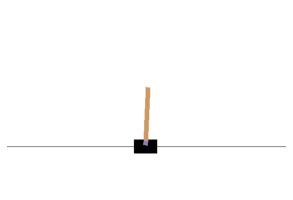

In [ ]:
def plot_environment(env, figsize=(5,4)):
  plt.figure(figsize=figsize)
  img=env.render(mode='rgb_array')
  plt.imshow(img)
  plt.axis('off')
  return img

plot_environment(env)
plt.show()

env.action_space를 통해 가능한 행동이 몇 개인지 파악할 수가 있다. 우리는 0과 1 두개의 행동이 가능하고 각각 왼쪽 가속, 오른쪽 가속에 해당한다.



In [ ]:
env.action_space

Discrete(2)

step()메소드를 통해 action을 실행할 수 있다. 이 때 step()메소드가 반환하는 값은 아래와 같이 4개이다.

* obs : action을 취함으로서 얻은 관측값들을 뜻한다. obs[1]이 음수가 되었으므로 카트가 오른쪽으로 움직이게 될 것이다. obs[2]를 보면 막대는 오른쪽 방향으로 아직 기울어져 있다. 하지만 각속도가 음수가 되었으므로 obs[3] < 0 다음 스텝 이후에는 왼쪽으로 기울어질 가능성이 크다.

* reward : agent의 목표는 카트에서 막대를 오랫동안 떨어트리지 않는 것이므로 어떤 action(오른쪽이던, 왼쪽이던)을 취해도 reward는 1이 될 것이다.

* done : 이 값이 True면 말그대로 이 eposide가 done인 상태가 된다(종료상태). 막대가 너무 기울어지거나 화면 밖으로 나갈 경우 혹은 정해진 최대 step인 200 step이 넘어갈 경우 episode는 종료된다. episode 종료 이후 꼭 reset을 통해 값을 초기화 해줘야 한다.

* info : 현재 cartpole 환경에서는 info가 비어있지만, 다른 환경의 경우 agent 생명이 몇 번 남았는지 등의 정보가 담긴다.

한 환경의 사용이 끝날 경우 close()메소드를 통해 자원을 release해준다.

In [ ]:
action=1 # 오른쪽 가속
obs, reward, done, info = env.step(action)
print('obs: ', obs)
print('reward: ', reward)
print('done: ', done)
print('info: ', info)

obs:  [-0.01261699  0.19292789  0.04204097 -0.28092127]
reward:  1.0
done:  False
info:  {}


basic policy로 angle이 0보다 작아지면, 즉 왼쪽으로 막대기가 기울면 왼쪽으로 가속하고 반대의 경우 오른쪽으로 가속하는 함수를 만들어 500번의 episode를 진행하였다. 500번의 시도에도 72번의 step을 넘기지 못하고 episode가 종료되었다.

In [ ]:
def basic_policy(obs):
  angle=obs[2]
  return 0 if angle < 0 else 1 # angle이 왼쪽으로 기울어져있으면 왼쪽으로 가속

total_score=[]
for episode in range(500):
  episode_reward=0
  obs=env.reset()
  for step in range(200):
    action=basic_policy(obs)
    obs, reward, done, info=env.step(action)
    episode_reward+=reward
    if done:
      break
  total_score.append(episode_reward)

np.mean(total_score), np.std(total_score), np.min(total_score), np.max(total_score)

(41.614, 9.138326104927533, 25.0, 72.0)